#**NAILIL MU'IZZAH (4101422131)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#pemanggilan data
data = pd.read_csv("produk_elektronik.csv")

In [ ]:
data.head()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,1,Produk_1,Smartwatch,746.0,4.2,273.0,Japan
1,2,Produk_2,Headphone,241.0,3.5,239.0,Canada
2,3,Produk_3,Tablet,810.0,3.8,209.0,Canada
3,4,Produk_4,Headphone,303.0,3.2,59.0,South Korea
4,5,Produk_5,Headphone,252.0,3.7,76.0,South Korea


In [ ]:
data.tail(5)

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
545,546,Produk_546,Laptop,496.0,3.9,19.0,China
546,547,Produk_547,Headphone,628.0,4.7,414.0,USA
547,548,Produk_548,Tablet,465.0,4.3,393.0,India
548,549,Produk_549,Laptop,495.0,3.1,311.0,Germany
549,550,Produk_550,Tablet,388.0,4.3,240.0,Germany


In [ ]:
#melihat statistika deskriptif
data.describe()

,produk_id,harga,rating,jumlah_ulasan
count,550.000000,520.000000,500.000000,530.000000
mean,275.500000,565.715385,4.005600,259.671698
std,158.915596,625.886725,0.571052,142.655380
min,1.000000,-213.000000,3.000000,12.000000
25%,138.250000,374.000000,3.500000,139.000000
50%,275.500000,516.000000,4.000000,262.500000
75%,412.750000,656.250000,4.500000,390.750000
max,550.000000,8341.000000,5.000000,499.000000


#1b.Tampilkan informasi tipe data setiap kolom dan cek apakah ada missing values.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          520 non-null    float64
 4   rating         500 non-null    float64
 5   jumlah_ulasan  530 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


Berdasarkan output diatas, dapat disimpulkan bahwa dataset tersebut, memiliki total: 7 kolom, dengan jumlah maksimal baris untuk setiap kolom sebanyak: 550 baris. Akan tetapi terdapat beberapa kolom yang memiliki jumlah baris < 550, maka akan dilakukan proses identifikasi lebih lanjut.

#Deteksi Missing Values

In [ ]:
data.isnull()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False


In [ ]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
produk_id,0
nama_produk,0
kategori,0
harga,30
rating,50
jumlah_ulasan,20
negara_asal,0


Ya, terdapat missing value yaitu 100.

Berdasarkan output summarize tersebut, diperoleh bahwa kolom yang mengandung Missing Values (blanks/ N/A (Python : nan atau NaN)) adalah kolom harga, rating, dan jumlah_ulasan.

#2a. Cek missing values pada dataset. Berapa jumlah missing values di setiap kolom?

In [ ]:
#mengetahui jumlah missing value di seluruh dataset
data.isnull().sum().sum()

100

jumlah missing value :
harga 30 missing values,
rating 50 missing values,
jumlah_ulasan 20 missing values

#2b. Jelaskan bagaimana keberadaan missing values dapat memengaruhi analisis data.

Missing values dalam data dapat memengaruhi analisis dengan berbagai cara. Jika data yang hilang dibiarkan begitu saja, hasil analisis bisa menjadi tidak akurat karena perhitungan statistik seperti rata-rata, median, atau regresi bisa terganggu. Misalnya, jika banyak nilai harga yang hilang dalam dataset produk, maka perhitungan harga rata-rata tidak akan mencerminkan kondisi sebenarnya. Selain itu, model prediksi atau machine learning juga bisa mengalami kesalahan karena algoritma biasanya membutuhkan data yang lengkap. Oleh karena itu, missing values perlu ditangani dengan cara yang tepat, seperti menghapus baris yang tidak lengkap atau mengisi nilai yang hilang dengan rata-rata, median, atau nilai lain yang sesuai agar analisis tetap valid dan bermanfaat.

#2c. Tentukan metode yang paling sesuai untuk menangani missing values di setiap kolom. Berikan alasan pemilihan metode tersebut.

Harga (30 missing values)
→ Data harga memiliki standar deviasi yang cukup besar, dan terdapat nilai negatif yang mungkin merupakan anomali atau kesalahan input. Hal ini menunjukkan adanya outlier. Metode yang cocok yaitu median karena terdapat outlier (nilai negatif dan angka ekstrem), median lebih baik digunakan daripada mean agar tidak terpengaruh oleh nilai ekstrem.

Rating (50 missing values)
→ Rating berkisar antara 3.0 hingga 5.0, dengan distribusi yang kemungkinan normal. Oleh karena itu, metode mean lebih cocok digunakan karena rating memiliki rentang kecil dan distribusi yang tampak normal.

Jumlah Ulasan (20 missing values)
→ Jumlah ulasan merupakan data diskrit.Oleh karena itu, metode modus lebih cocok untuk mengisi nilai yang hilang dengan nilai yang paling sering muncul.

#2d. Tangani missing values dengan metode yang sesuai

#1. Harga

In [ ]:
#melihat isi dalam kolom duration
data['harga'].unique()

array([ 7.460e+02,  2.410e+02,  8.100e+02,  3.030e+02,  2.520e+02,
        3.350e+02,  8.900e+02,  4.910e+02,  6.050e+02,  4.630e+02,
        4.810e+02,  3.980e+02,  5.100e+02,  5.980e+02,  8.350e+02,
        1.250e+02,  8.220e+02,  4.260e+02,  3.900e+02,  7.080e+02,
        5.450e+02,        nan,  5.720e+02,  7.280e+02,  6.710e+02,
        3.740e+02,  2.310e+02,  4.340e+02,  1.150e+03,  3.310e+02,
        5.780e+02,  4.750e+02,  4.590e+02,  9.040e+02,  4.970e+02,
        5.400e+02,  3.390e+02,  2.110e+02,  8.620e+02,  5.800e+02,
        5.180e+02,  5.160e+02,  4.480e+02,  7.360e+02,  2.280e+02,
        1.830e+02,  5.150e+02,  7.120e+02,  5.470e+02,  4.360e+02,
        5.910e+02,  5.370e+02,  6.650e+02,  7.650e+02,  3.090e+02,
        4.290e+02,  2.960e+02,  6.660e+02,  3.550e+02,  1.240e+02,
        3.850e+02,  2.010e+02,  8.180e+02,  5.940e+02,  6.290e+02,
        6.070e+02,  6.680e+02,  7.260e+02,  3.920e+02,  2.160e+02,
        3.300e+02,  4.900e+02, -1.200e+01,  1.200e+02,  6.190e

In [ ]:
#mengisi missing value
data['harga']=data['harga'].fillna(data['harga'].median())

In [ ]:
#jumlah missing value
np.sum(data['harga'].isnull())

0

#2. Rating

In [ ]:
#melihat isi dalam kolom rating
data['rating'].unique()

array([4.2, 3.5, 3.8, 3.2, 3.7, 4. , 4.5, 3. , 3.9, 3.6, 4.7, 4.4, nan,
       3.1, 4.9, 4.6, 5. , 4.8, 4.3, 3.4, 4.1, 3.3])

In [ ]:
#jumlah missing value
np.sum(data['rating'].isnull())

50

In [ ]:
#mengisi missing value
data['rating']=data['rating'].fillna(data['rating'].mean())

In [ ]:
#jumlah missing value
np.sum(data['rating'].isnull())

0

#3 Jumlah_ulasan

In [ ]:
#melihat isi dalam kolom rating
data['jumlah_ulasan'].unique()

array([273., 239., 209.,  59.,  76., 309., 390.,  67., 268.,  nan, 335.,
       139., 224., 181., 267., 111., 218., 300., 363., 480., 295., 125.,
       159., 451.,  45., 462., 342., 486., 296., 312., 320., 217., 115.,
       455., 167., 130.,  64., 409.,  21., 154., 405., 145., 477.,  12.,
       153.,  39., 246., 288., 357., 113., 127.,  14., 257., 373., 330.,
       158.,  93., 463., 475., 465., 240., 297., 170., 281., 469.,  47.,
       235., 151., 301., 490., 160., 123.,  75., 370., 350., 484., 258.,
       466., 458., 340., 332., 189., 199., 416., 163., 205., 271., 428.,
       415., 436., 152., 351., 110., 253., 499., 248.,  58.,  51., 175.,
        91., 438., 225., 471., 143., 345.,  16., 445.,  23.,  82., 408.,
       414., 172., 356., 215., 285., 265., 275.,  34., 459., 290., 262.,
       319., 298., 173., 104., 119., 247., 396., 492., 434., 399., 150.,
       126., 491., 401., 461.,  88.,  77., 182., 453., 137., 105., 101.,
        40., 343.,  29., 155., 325., 456., 169., 35

In [ ]:
#jumlah missing value
np.sum(data['jumlah_ulasan'].isnull())

20

In [ ]:
#mengisi missing value
data['jumlah_ulasan']=data['jumlah_ulasan'].fillna(data['jumlah_ulasan'].mode()[0])

In [ ]:
#jumlah missing value
np.sum(data['jumlah_ulasan'].isnull())

0

#3a.Identifikasi outlier dalam dataset

Boxplot → Visualisasi distribusi dan outlier

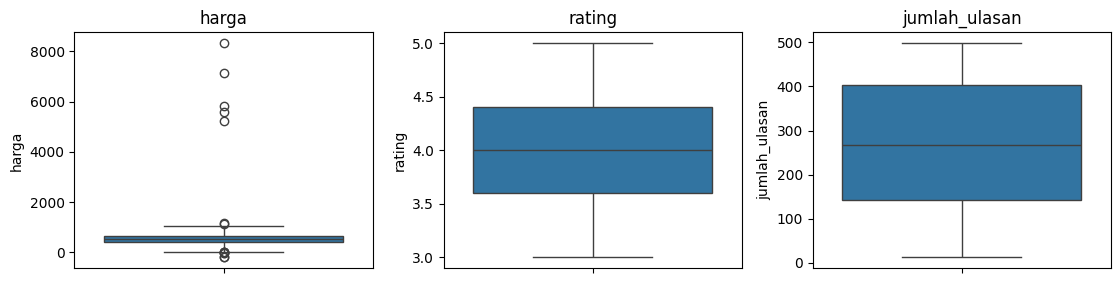

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['harga','rating','jumlah_ulasan']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()



#3b. Apa dampak dari keberadaan outlier terhadap analisis?

Keberadaan outlier dalam dataset dapat mempengaruhi hasil analisis dengan berbagai cara. Outlier dapat menyebabkan nilai rata-rata menjadi tidak akurat karena nilai yang sangat tinggi atau rendah akan menarik rata-rata ke arah yang ekstrem. Selain itu, dalam analisis statistik seperti regresi atau clustering, outlier dapat mengganggu pola yang sebenarnya ada dalam data dan menyebabkan model menghasilkan prediksi yang kurang akurat. Dalam visualisasi data, outlier juga dapat membuat grafik menjadi kurang representatif terhadap mayoritas data. Oleh karena itu, sebelum melakukan analisis lebih lanjut, penting untuk mengidentifikasi dan mempertimbangkan apakah outlier perlu dihapus, diperbaiki, atau tetap digunakan tergantung pada konteks dan tujuan analisis.

#3c. Pilih metode yang sesuai untuk menangani outlier dan jelaskan alasan pemilihannya.

Untuk menangani outlier dalam dataset ini, metode yang paling sesuai adalah **Winsorizing**, yaitu mengganti nilai outlier dengan batas kuartil (Q1 atau Q3). Metode ini dipilih karena jumlah outlier dalam kolom `harga` tidak terlalu banyak, dan informasi yang terkandung dalam data tetap penting untuk analisis. Jika outlier dihapus, maka bisa terjadi kehilangan informasi yang berharga. Dengan mengganti outlier menggunakan batas kuartil, distribusi data tetap terjaga tanpa menghilangkan terlalu banyak variasi. Pendekatan ini juga membantu menjaga keakuratan analisis statistik dan model prediksi yang mungkin akan digunakan selanjutnya.

#3d.Tangani outlier dengan metode yang sesuai, atau jika memilih tidak menangani outlier berikan alasannya.

📌 **Winsorizing (Mengganti Outlier dengan Batas IQR)**

In [ ]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

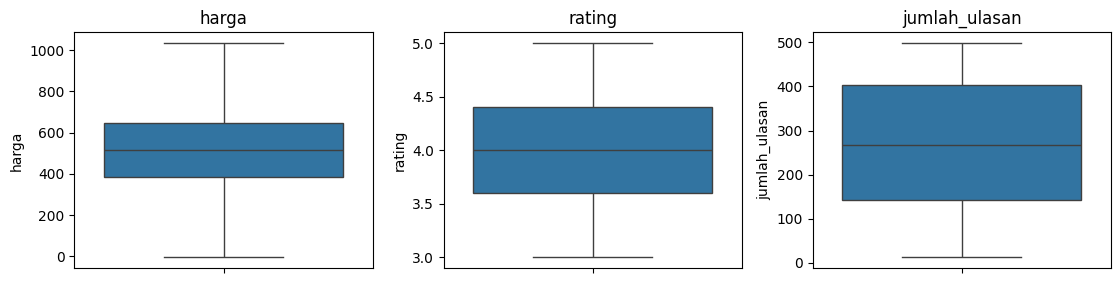

In [ ]:
#cek boxplot lagi

num_cols = ['harga', 'rating', 'jumlah_ulasan']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

 # 4a. Tentukan kolom mana yang memerlukan encoding.

Dalam dataset ini, kolom yang memerlukan encoding adalah kolom yang berisi data kategori atau teks yang tidak bisa langsung digunakan dalam analisis numerik atau pemodelan mesin. Berdasarkan struktur data sebelumnya, kolom yang termasuk dalam kategori ini adalah **"kategori"** (jenis produk seperti Smartwatch, Headphone, Tablet) dan **"negara_asal"** (asal negara produk seperti Japan, Canada, South Korea). Kolom **"nama_produk"** tidak perlu encoding karena biasanya hanya sebagai identitas dan tidak memiliki pengaruh terhadap analisis statistik. Dengan melakukan encoding pada kolom kategori, kita dapat mengubahnya menjadi format numerik sehingga dapat digunakan dalam pemodelan atau analisis lebih lanjut.

#4b. Bandingkan berbagai metode encoding dan pilih metode yang paling sesuai untuk setiap kolom. Jelaskan alasan pemilihan metode tersebut.

Dalam mengolah data, pemilihan metode encoding yang tepat sangat penting agar model dapat memahami data dengan baik. Untuk kolom "kategori", metode One-Hot Encoding (OHE) paling sesuai karena kategori seperti "Smartwatch", "Headphone", dan "Tablet" tidak memiliki urutan tertentu, sehingga lebih baik direpresentasikan dalam bentuk biner tanpa memberikan bobot yang tidak semestinya. Selanjutnya, untuk kolom "negara_asal", metode Frequency Encoding lebih cocok karena jumlah negara kemungkinan cukup banyak, dan informasi frekuensi kemunculannya dalam dataset dapat menjadi fitur yang berguna dalam analisis.

In [ ]:
#melihat isi dalam kolom
data['kategori'].unique()

array(['Smartwatch', 'Headphone', 'Tablet', 'Laptop', 'Camera',
       'Smartphone'], dtype=object)

In [ ]:
#melihat isi dalam kolom
data['negara_asal'].unique()

array(['Japan', 'Canada', 'South Korea', 'France', 'USA', 'Germany',
       'China', 'India', 'UK'], dtype=object)

In [ ]:
import pandas as pd

# Contoh data kategori
kategori = ["Smartwatch", "Headphone", "Tablet", "Headphone", "Smartwatch", "Laptop"]

# Mengonversi ke DataFrame untuk One-Hot Encoding
kategori_df = pd.DataFrame({"kategori": kategori})

# Menerapkan One-Hot Encoding
kategori_encoded = pd.get_dummies(kategori_df, columns=["kategori"], prefix="kategori")

# Menampilkan hasil encoding
kategori_encoded

,kategori_Headphone,kategori_Laptop,kategori_Smartwatch,kategori_Tablet
0,False,False,True,False
1,True,False,False,False
2,False,False,False,True
3,True,False,False,False
4,False,False,True,False
5,False,True,False,False


In [ ]:
import pandas as pd

# Contoh data negara_asal
negara_asal = ["Japan", "Canada", "Canada", "South Korea", "South Korea", "Japan", "Japan", "Canada"]

# Mengonversi ke DataFrame
negara_df = pd.DataFrame({"negara_asal": negara_asal})

# Menghitung frekuensi kemunculan setiap kategori
frekuensi = negara_df["negara_asal"].value_counts()

# Menerapkan Frequency Encoding
negara_df["negara_encoded"] = negara_df["negara_asal"].map(frekuensi)

# Menampilkan hasil encoding
negara_df

,negara_asal,negara_encoded
0,Japan,3
1,Canada,3
2,Canada,3
3,South Korea,2
4,South Korea,2
5,Japan,3
6,Japan,3
7,Canada,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          550 non-null    float64
 4   rating         550 non-null    float64
 5   jumlah_ulasan  550 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB
